# Métodos Numéricos - Raíces

## Libraries

In [1]:
import numpy as np
import matplotlib.pylab as plt

## Derivatives

In [2]:
def derivative(f,a,h=0.001):
  return (f(a + h) - f(a))/h

In [3]:
# Example of the derivative function
h = lambda x: (x**2)

derivative(h,3)

6.000999999999479

## Newton - Raphson

$$x_{n+1}=x_n-\frac{f(x_n)}{f'(x_n)}$$

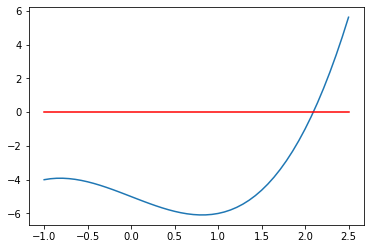

In [4]:
x=np.linspace(-1,2.5,50)
plt.figure()
plt.plot(x,x**3-2*x-5)
plt.plot([-1,2.5],[0,0],"r")
plt.show()

In [5]:
#def thefun(x):
#    return (x-1.)**3
#def thefunder(x):
#    return 3*(x-1.)**2
def thefun(x):
    return x**3 - 2*x - 5
def thefunder(x):
    return 3*x**2 - 2

In [6]:
def newtrap(x):
    newx = x - thefun(x)/thefunder(x)
    return newx

In [7]:
x=1.5
for i in range(10):
    x=newtrap(x)
    print(x)

2.473684210526316
2.156432996122822
2.0966046038619233
2.094553850744971
2.0945514815454866
2.0945514815423265
2.0945514815423265
2.0945514815423265
2.0945514815423265
2.0945514815423265


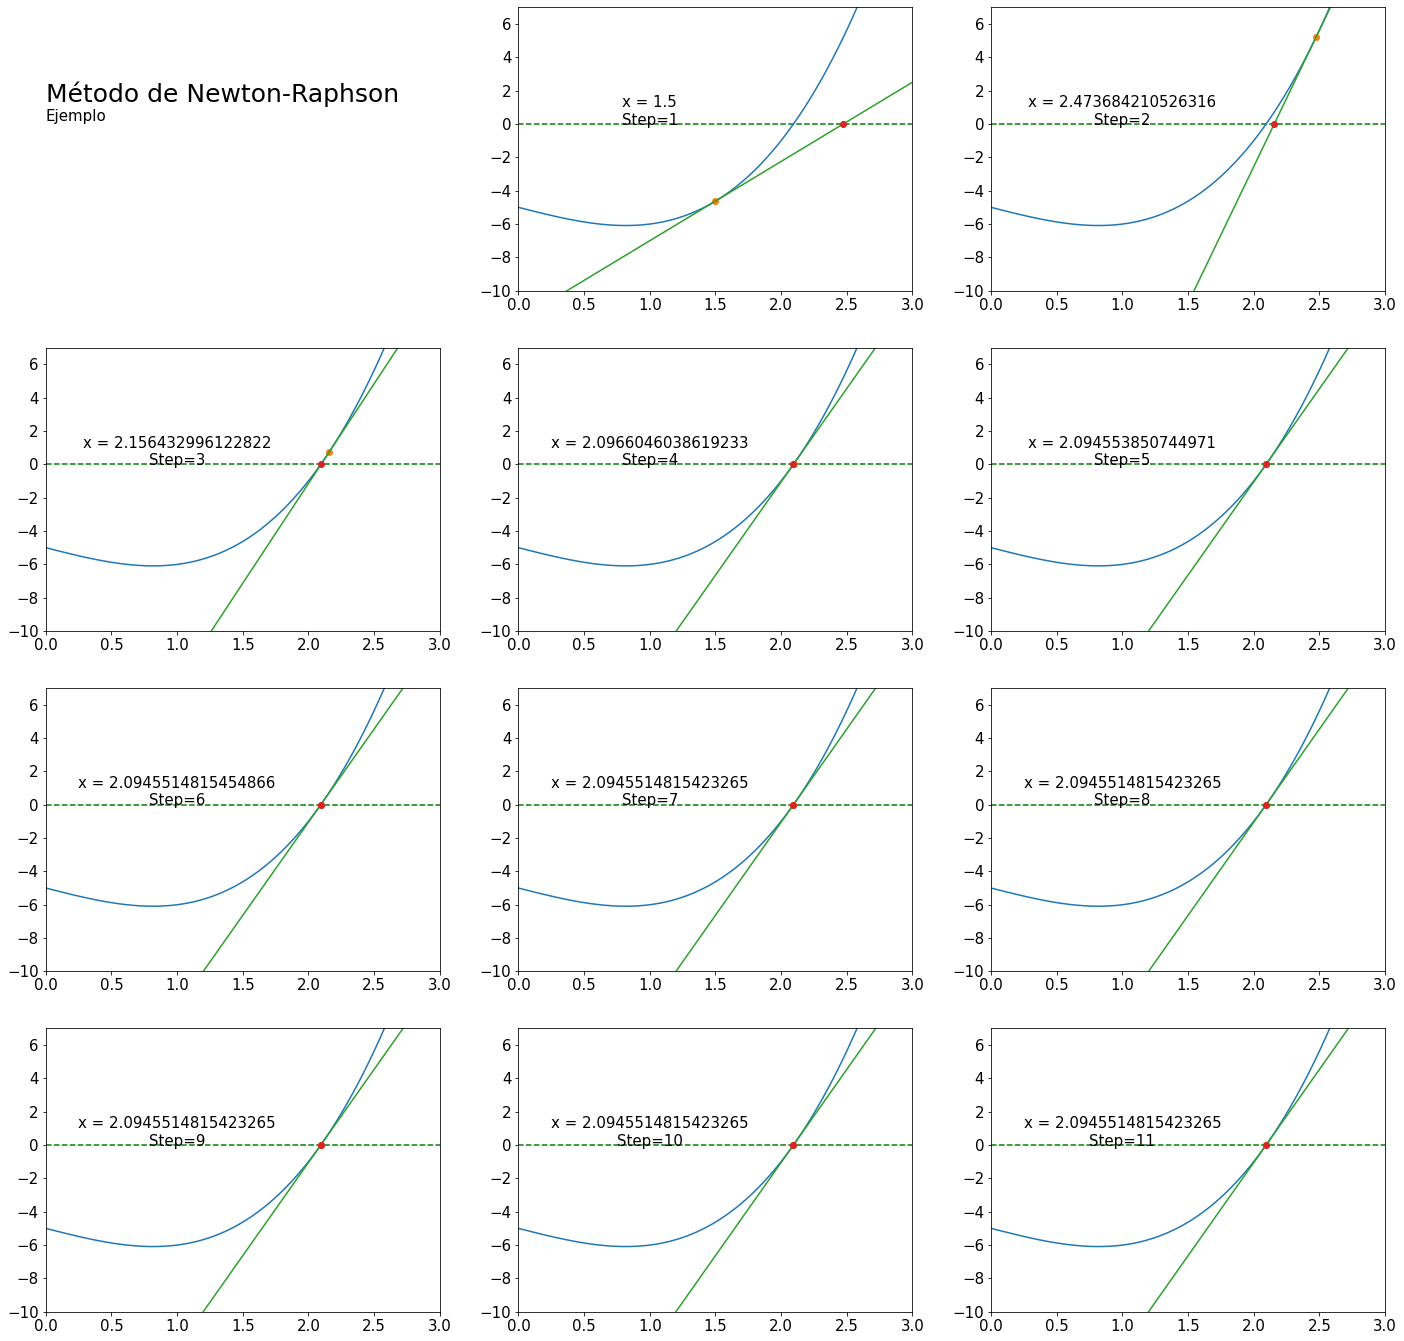

In [8]:
xvals = np.linspace(0,3,100)
# Start x for the algorithm
plt.figure(figsize=(24,24))
guess = 1.5
guesslist = [(0,guess)]
plt.rc("font",size=15)
plt.subplot(4,3,+1)
plt.xlim(0,3)
plt.ylim(-10,5)
plt.axis("off")
plt.text(0,0,u"Método de Newton-Raphson",fontsize=25)
plt.text(0,-1,u"Ejemplo",fontsize=15)
for i in range(1,12):
    # Draw the x axis
    plt.subplot(4,3,i+1)
    plt.plot([0,3],[0,0],"g--")
    plt.plot(xvals,thefun(xvals))
    # Plot the currrent guess with y val
    yval = thefun(guess)
    plt.plot([guess],[yval],"o")
    # Put the current guess
    plt.text(1,0.75,"x = "+str(guess)+"\nStep="+str(i),ha="center",va="center")
    # Calculate the tangent parameters
    slope = thefunder(guess)
    xtan1 = guess - 2
    ytan1 = slope*(xtan1-guess) + yval
    xtan2 = guess + 2
    ytan2 = slope*(xtan2-guess)+yval
    # And now plot it
    plt.plot([xtan1,xtan2],[ytan1,ytan2])
    # Calculate the new guess
    guess=newtrap(guess)
    plt.plot([guess],[0],"o")
    plt.xlim(0,3)
    plt.ylim(-10,7)
    guesslist.append((i+1,guess))
plt.show()

In [9]:
guesslist

[(0, 1.5),
 (2, 2.473684210526316),
 (3, 2.156432996122822),
 (4, 2.0966046038619233),
 (5, 2.094553850744971),
 (6, 2.0945514815454866),
 (7, 2.0945514815423265),
 (8, 2.0945514815423265),
 (9, 2.0945514815423265),
 (10, 2.0945514815423265),
 (11, 2.0945514815423265),
 (12, 2.0945514815423265)]

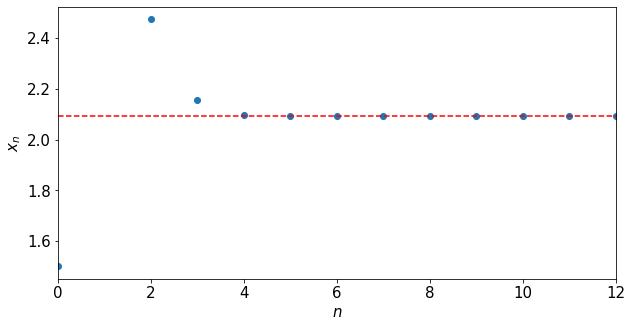

In [10]:
plt.figure(figsize=(10,5))
xy = list(zip(*guesslist))
x = list(xy[0])
y = list(xy[1])
plt.scatter(x,y)
plt.xlabel(r"$n$")
plt.ylabel(r'$x_n$')
plt.xlim(0,12)
plt.plot([0,12],[2.094,2.094],"r--")
plt.show()

## Método de bisección

In [11]:
def bisection(f,a,b): #(a,b)
    c=(a+b)/2.
    prod=f(a)*f(c) # 
    if  prod < 0: # sign(f(a)) != sign(f(m))
        b=c #(a,c)
    elif prod > 0: # sign(f(a)) == sign(f(m))
        a=c #(c,b)
    else:
        a=c
        b=c
    return (a,b) 
def nbisection(f,a,b,numiter):
    for i in range(numiter):
        a,b=bisection(f,a,b)
    return a
def thefun(x):
    return x**3 - 2*x - 5

In [12]:
x=[0,1.5]
for i in range(10):
    x=bisection(thefun,x[0],x[1])
    print(x[0])

0.75
1.125
1.3125
1.40625
1.453125
1.4765625
1.48828125
1.494140625
1.4970703125
1.49853515625


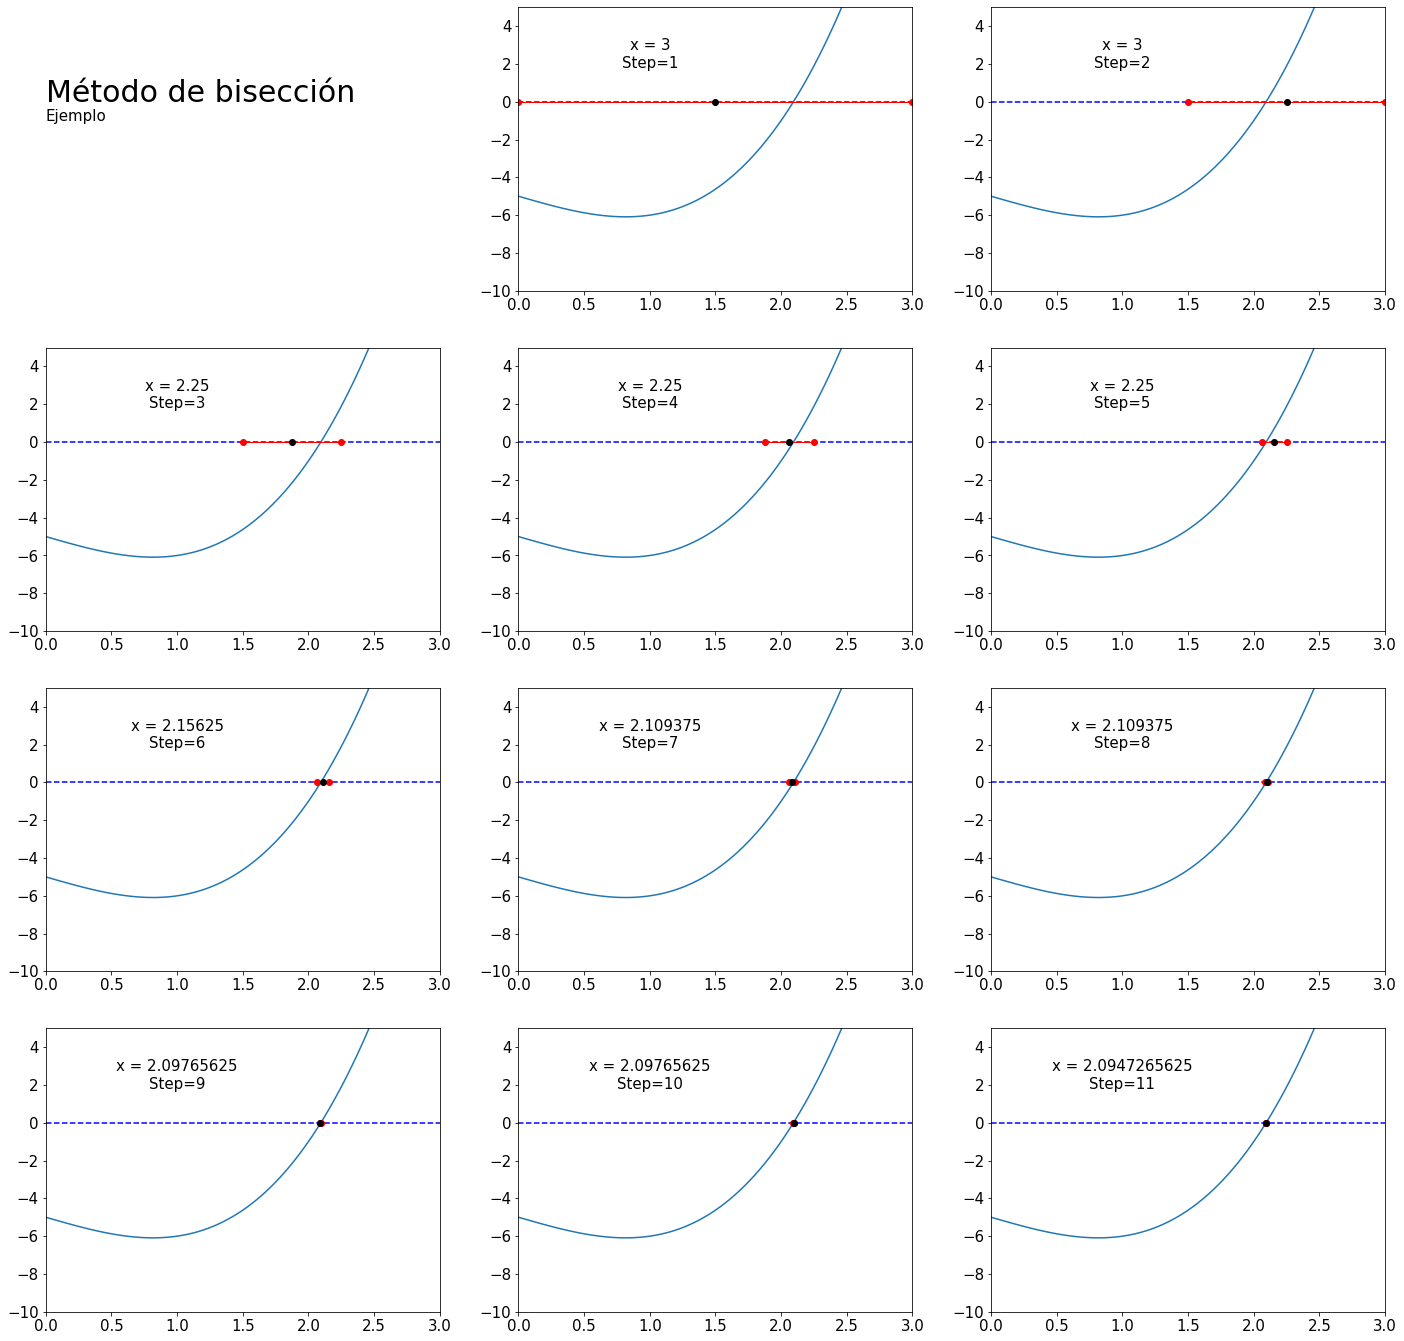

In [13]:
xvals = np.linspace(0,3,100)
# Start x for the algorithm
plt.figure(figsize=(24,24))
guess = [0,3]
guesslist = [(0,guess)]
plt.rc("font",size=15)
plt.subplot(4,3,+1)
plt.xlim(0,3)
plt.ylim(-10,5)
plt.axis("off")
plt.text(0,0,u"Método de bisección",fontsize=30)
plt.text(0,-1,u"Ejemplo",fontsize=15)
for i in range(1,12):
    # Draw the x axis
    plt.subplot(4,3,i+1)
    plt.plot([0,3],[0,0],"b--")
    plt.plot(xvals,thefun(xvals))
    # Plot the currrent interval
    plt.plot(guess,[0,0],"r",lw=1)
    plt.plot(guess,[0,0],"ro")
    # Plot the middle point
    plt.plot([0.5*(guess[0]+guess[1])],[0],"ok")
    # Put the current guess
    plt.text(1,2.5,"x = "+str(guess[1])+"\nStep="+str(i),ha="center",va="center")
    # Calculate the new guess
    guess=bisection(thefun,guess[0],guess[1])
    plt.xlim(0,3)
    plt.ylim(-10,5)
    guesslist.append((i+1,guess))
plt.show()

#Ejemplo de Markdown
# Primer Capítulo
## Primera secciión
Esta es la primera seccikón.
Y aquí está una lista
1. Primer item
2. Segundo item
3. etc
100. etc

*** Enfásis ***

##Wien's displacement law

Wien's diplacement law states that the wavlength distribution of thermal radiation from a black body at any temperature has essentially the same shape as the distribution at any other temperature, except that each wavelength is displace on the graph.
Apart from an overall $T^4$ multiplicative factor, the average thermal energy in each mode with frequency $\nu$ only depends on the ration $\nu/T$. Restated in terms of the wavelenth $\lambda=c/\nu$, the distributions at corresponding wavelengths are related, where corresponding wavelengths are at locations proportional to $1/T$. Blackbody radiation approximates to Wien's law at high frequency.

From this general law, it follow that there is an inverser relationship between the wavelength of the peak of the emission of a black body and its temperature when expressed as a function of wavelength, and this less powerfull conseuency is often also called Wien's displacement law in many textbooks.

$ \lambda_{\mathrm{max}} T = b $

where $\lambda_{\mathrm{max}}$ is the peak wavelength. $T$ is the absolute temperature of the black body, and $b$ is a constant of proportionality called Wien's displacement constant, equal to $2.8977721(26)\times 10^{-3} \mathrm{m}\mathrm{K}$.

<ipython-input-14-b6fd2fb343a5>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xvals,xvals**3*1/(np.exp(xvals/T)-1))
<ipython-input-14-b6fd2fb343a5>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xvals,xvals**3*1/(np.exp(xvals/T)-1))
<ipython-input-14-b6fd2fb343a5>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(xvals,xvals**3*1/(np.exp(xvals/T)-1))


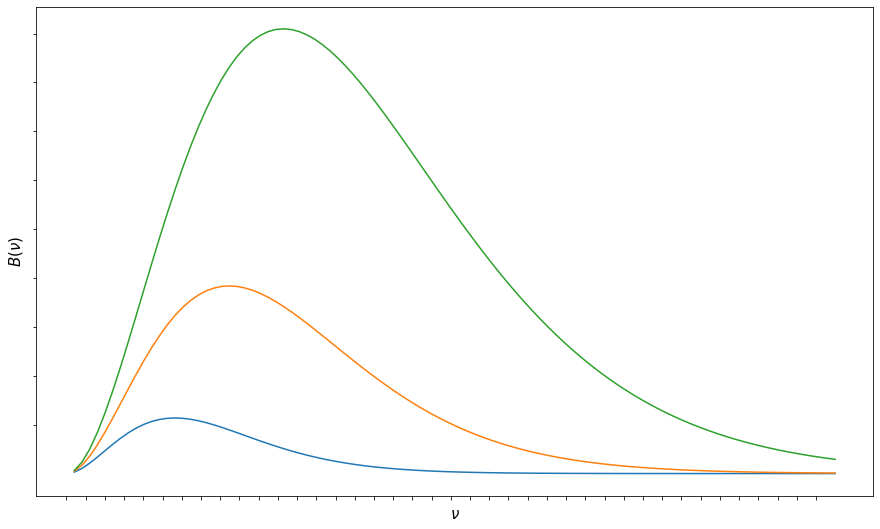

In [14]:
xvals = np.linspace(0,40,100)
plt.figure(figsize=(15,9))
for T in range(2,5):
    plt.plot(xvals,xvals**3*1/(np.exp(xvals/T)-1))
plt.xticks(range(40),(""))
plt.yticks(10*np.arange(1,10),(""))
plt.xlabel(r"$\nu$")
plt.ylabel(r"$B(\nu)$")
plt.show()

* Derivation from Planck's Law

Wilhelm Wien first derived this law in 1893 by applying the laws of thermodynamics to electromagnetic radiation. A modern variant of Wien's derivation can be found in the textbook by Wannier.

Planck's law for the spectrum of black body radiation may be used to find the actual constant in the peak displacement law. Specifically, the spectral energy density (that is, the energy density per unit frequency) is

$u(\nu, T)\partial \nu = {8\pi \nu^2 \over c^3}{h \nu \over e^{h v/kT}-1}\partial \nu.$

However the frequency is a non-linear function of wavelength

$\nu = {c \over \lambda} \rightarrow \partial \nu = - {c \over \lambda^2}\partial \lambda$.

This allows to present the energy density depending on the wavelength

$u(\lambda,T)\partial \lambda = {8\pi h c\over \lambda^5}{1\over e^{h c/\lambda kT}-1}\partial \lambda$

Differentiating $u(\lambda,T)$ with respect to $\lambda$ and setting the derivative equal to zero gives

${ \partial u \over \partial \lambda } = 8\pi h c\left( {hc\over kT \lambda^7}{e^{h c/\lambda kT}\over \left(e^{h c/\lambda kT}-1\right)^2} -  {1\over\lambda^6}{5\over e^{h c/\lambda kT}-1}\right)=0,$

which can be simplified to give

${hc\over\lambda kT }{e^{h c/\lambda kT}\over e^{h c/\lambda kT} -1} - 5 = 0. $

By defining the dimensionless quantity

$x\equiv{hc\over\lambda kT },$

then the equation becomes

${x e^x \over e^x - 1}-5=0$

The numerical solution to this equation is

$x = 4.965114231744276$

In [15]:
E=np.exp(1)
def thefun(x):
    return x/(1.-np.exp(-x))-5.
# Trick from Mathematica to Python
def thefunder(x):
    return (E**x*(-1 + E**x - x))/(-1 + E**x)**2

In [16]:
def newtrap(x):
    newx = x - thefun(x)/thefunder(x)
    return newx

In [17]:
guess=2.1
for i in range(10):
    guess = newtrap(guess) # x_i+1 = x_i - f(x_i)/f'(x_i)
    print(guess)

5.336009681997056
4.966381926072764
4.965114249486644
4.965114231744277
4.965114231744276
4.965114231744277
4.965114231744276
4.965114231744277
4.965114231744276
4.965114231744277


In [18]:
guess

4.965114231744277

##Números Complejos y Meshgrid

In [19]:
z=1+2.1j

In [20]:
type(z)

complex

In [21]:
z**2

(-3.41+4.2j)

In [22]:
z1=1+1j
z2=2-2j
z1-z2

(-1+3j)

In [23]:
z.imag

2.1

In [24]:
z.real

1.0

In [25]:
np.angle(z)

1.1263771168937977

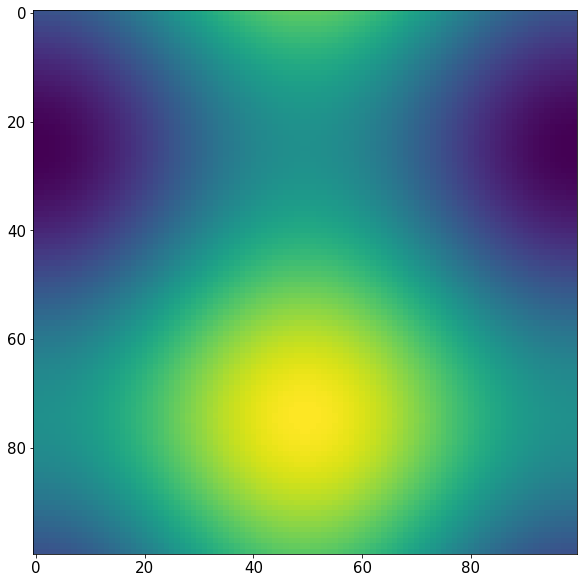

In [26]:
# Usar meshgrid para evaluar funciones en una cuadrícula
x, y = np.meshgrid(np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100))
z = np.cos(x)+np.sin(y)
plt.figure(figsize=(10,10))
plt.imshow(z)
plt.savefig("figura.png",dpi=100)
plt.show()

In [27]:
np.meshgrid([-1,0,1],[0,1,2])

[array([[-1,  0,  1],
        [-1,  0,  1],
        [-1,  0,  1]]),
 array([[0, 0, 0],
        [1, 1, 1],
        [2, 2, 2]])]

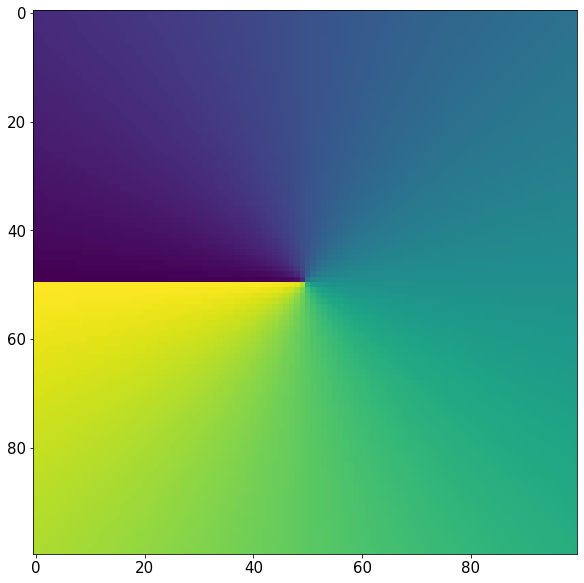

In [28]:
# También puede utilizarse para evaluar funciones de variable compleja
x, y = np.meshgrid(np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100))
z = x+1j*y
zf = np.angle(z)
plt.figure(figsize=(10,10))
plt.imshow(zf)
plt.show()

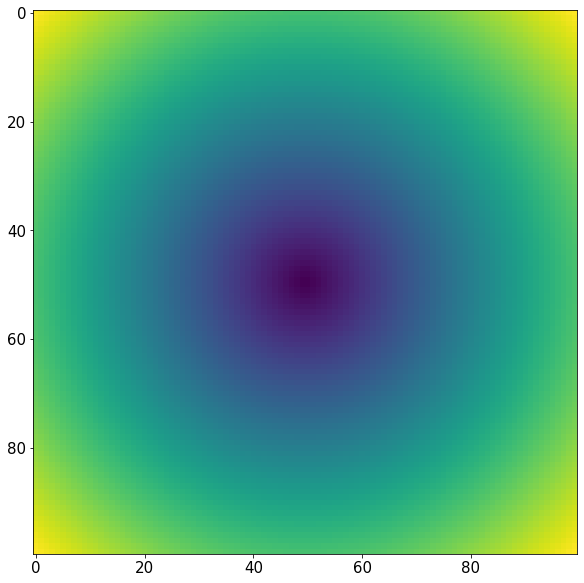

In [29]:
# También puede utilizarse para evaluar funciones de variable compleja
x, y = np.meshgrid(np.linspace(-np.pi,np.pi,100),np.linspace(-np.pi,np.pi,100))
z = x+1j*y
zf = abs(z)
plt.figure(figsize=(10,10))
plt.imshow(zf)
plt.show()